In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Training Data**

In [3]:
df_train = pd.read_csv('train.csv')
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Testing Data**

In [4]:
df_test = pd.read_csv('test.csv')
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Train and Test Images**

In [5]:
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

**Visualizing the Data**

In [6]:
def viz_num(num):
    #Reshape the 768 values to a 28x28 image
    image = X_train.values[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, y_train[num]))
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.show()

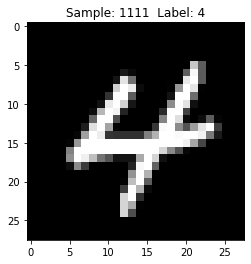

In [7]:
viz_num(1111)

**Formatting the Data**

In [8]:
X_train = X_train/255.0
df_test = df_test/255.0
X_train = X_train.values.reshape(-1, 28, 28, 1)
df_test = df_test.values.reshape(-1, 28, 28, 1)

In [9]:
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop

In [10]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [11]:
y_train = keras.utils.to_categorical(y_train)
y_validation = keras.utils.to_categorical(y_validation)

**Modeling**

In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28 ,28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same',))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same',))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same',))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
from keras.callbacks import EarlyStopping

In [14]:
early_stopping = EarlyStopping(min_delta=0.001, patience=5, restore_best_weights=True)

In [15]:
history = model.fit(
    x=X_train, 
    y=y_train, 
    batch_size=32, 
    epochs=20, 
    callbacks=[early_stopping], 
    validation_data=(X_validation, y_validation))

Epoch 1/20
1050/1050 [==============================] - 83s 78ms/step - loss: 0.1618 - accuracy: 0.9478 - val_loss: 0.0676 - val_accuracy: 0.9798
Epoch 2/20
1050/1050 [==============================] - 81s 77ms/step - loss: 0.0469 - accuracy: 0.9854 - val_loss: 0.0577 - val_accuracy: 0.9818
Epoch 3/20
1050/1050 [==============================] - 83s 79ms/step - loss: 0.0329 - accuracy: 0.9891 - val_loss: 0.0937 - val_accuracy: 0.9740
Epoch 4/20
1050/1050 [==============================] - 81s 77ms/step - loss: 0.0254 - accuracy: 0.9917 - val_loss: 0.0365 - val_accuracy: 0.9885
Epoch 5/20
1050/1050 [==============================] - 91s 86ms/step - loss: 0.0187 - accuracy: 0.9935 - val_loss: 0.0502 - val_accuracy: 0.9850
Epoch 6/20
1050/1050 [==============================] - 85s 81ms/step - loss: 0.0142 - accuracy: 0.9956 - val_loss: 0.0434 - val_accuracy: 0.9875
Epoch 7/20
1050/1050 [==============================] - 81s 77ms/step - loss: 0.0148 - accuracy: 0.9949 - val_loss: 0.0391 -

In [16]:
score = (max(history.history['val_accuracy']))
print(score)

0.9891666769981384


**Submission**

In [18]:
sample_submission = pd.read_csv('sample_submission.csv')

In [19]:
sample_submission

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [20]:
y_test = model.predict(df_test)
y_test = np.argmax(y_test, axis=1)
y_test

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [21]:
submission = pd.DataFrame(columns=['ImageId', 'Label'])

In [22]:
submission['ImageId'] = range(1, 1+len(df_test))
submission['Label'] = y_test

In [23]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [24]:
submission.to_csv('submissions.csv', index=False)